<a href="https://colab.research.google.com/github/hazmicokro/Data-Literate-Bootcamp-2020/blob/main/weekly_task_6_M_Hazmi_Cokro_Mandiri_K%20Nearest%20Neighbors%20(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**M Hazmi Cokro M / @hazmicokro / Week 6 / KNN**

# K Nearest Neighbors Project 

## Import Libraries
**Import pandas,seaborn, dan yang lain.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/weekly_task_5_M Hazmi Cokro Mandiri'

/content/drive/MyDrive/weekly_task_5_M Hazmi Cokro Mandiri


## Get the Data
**Baca  'KNN_Project_Data csv ke dataframe**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/weekly_task_5_M Hazmi Cokro Mandiri/[2] KNN_Project_Data.csv')

**Check the head of the dataframe.**

In [ ]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA


**Gunakan seaborn pada dataframe untuk membuat pairplot dengan hue kolom TARGET CLASS.**

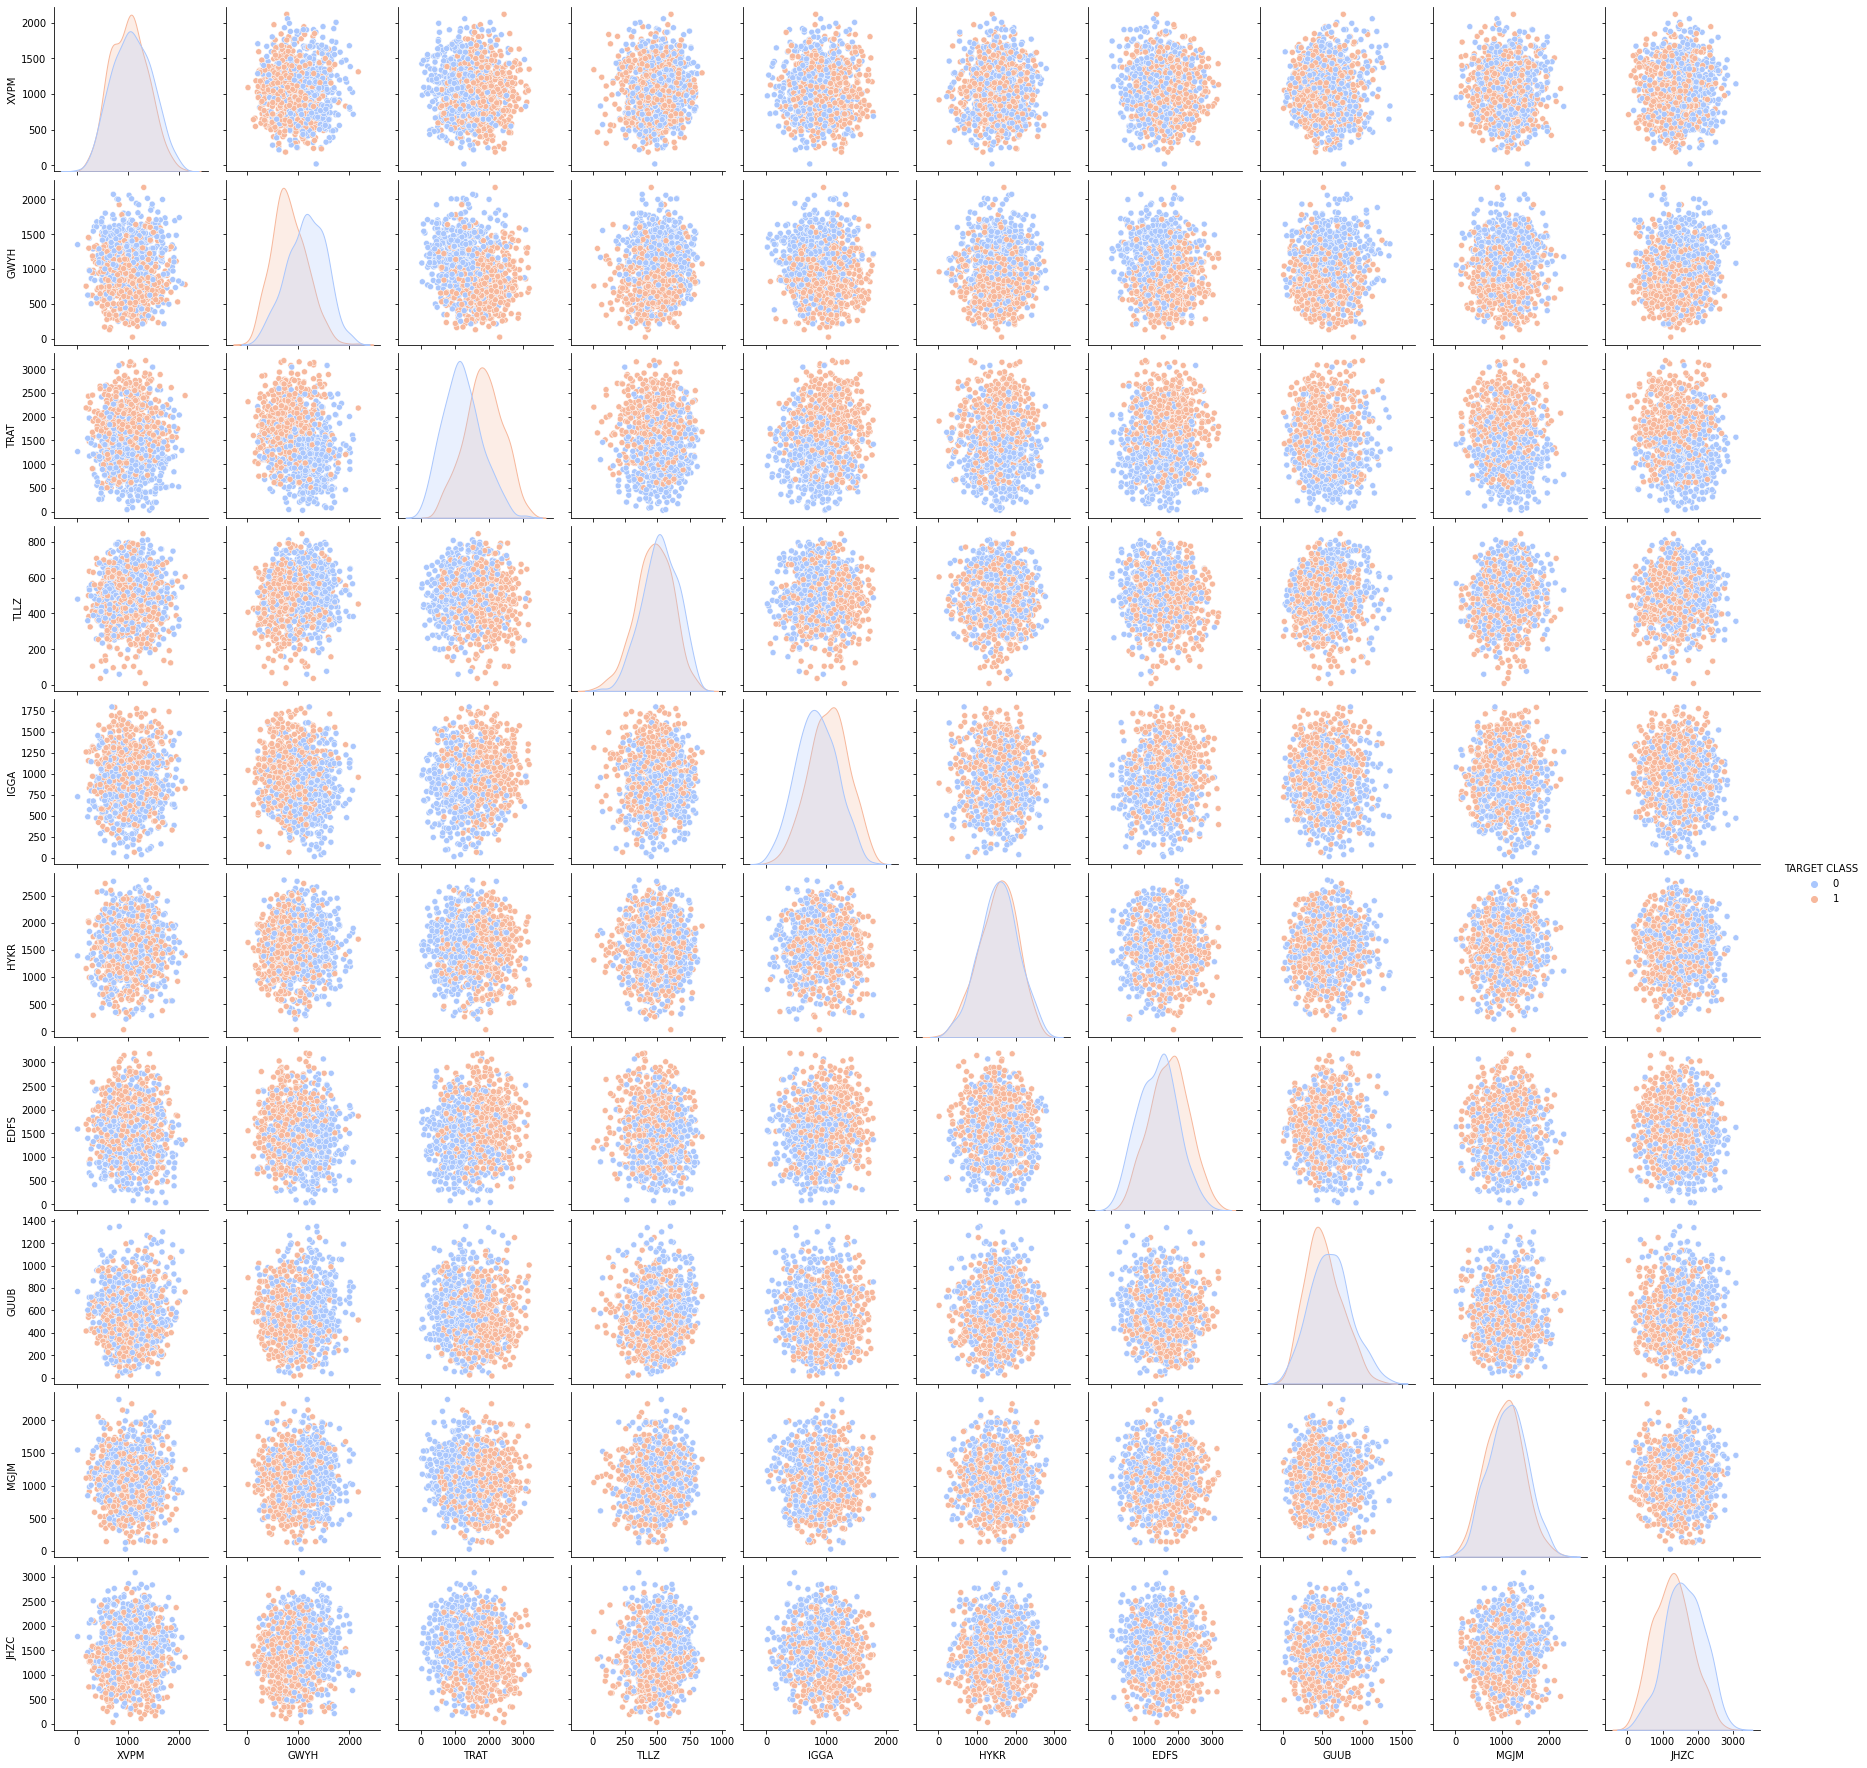

In [ ]:
sns.pairplot(df, hue = 'TARGET CLASS', palette='coolwarm')

# Standardize the Variables


**Import StandardScaler dari Scikit learn.**

In [ ]:
from sklearn.preprocessing import StandardScaler

**buat object StandardScaler() dengan nama scaler.**

In [ ]:
myscaler = StandardScaler()

**Fit scaler ke features.**

In [ ]:
myscaler.fit(X = df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Gunakan .transform() method untuk mengubah feature ke scaled version.**

In [ ]:
X = myscaler.transform(X = df.drop('TARGET CLASS', axis = 1))

**Ubah scaled features menjadi dataframe dan cek head dari dataframe untuk memastikan scaling bekerja.**

In [ ]:
tdf = pd.DataFrame(X, columns=df.columns[:-1])
tdf.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Gunakan train_test_split untuk mengubah data menjadi training set dan a testing set.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Buat KNN model dengan n_neighbors=1**

In [ ]:
myKNN = KNeighborsClassifier(n_neighbors = 1)

**Fit KNN model ke training data.**

In [ ]:
myKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations

**Gunakan predict method untukt memprediksi nilai menggunakan KNN model dan X_test.**

In [ ]:
y_predict = myKNN.predict(X_test)

**Buat a confusion matrix and classification report.**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test,y_predict))

[[109  43]
 [ 41 107]]


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value
Gunakan elbow method untuk menentukan K Value!

**Buat perulangan yang mentraining model KNN dengan nilai k yang berbeda kemudian simpan eror rate dengan list**

In [ ]:
err_rates = []
for idx in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = idx)
    knn.fit(X_train, y_train)
    pred_idx = knn.predict(X_test)
    err_rates.append(np.mean(y_test != pred_idx))

**Kemudian buat plot menggunakan informasi dari perulangan anda tadi.**

Text(0.5, 1.0, 'Error Rate vs K-value')

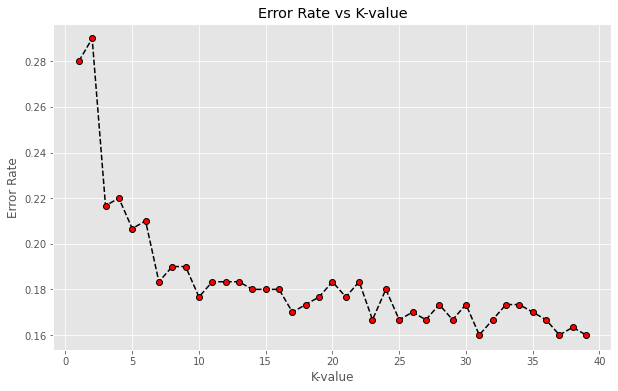

In [ ]:
plt.style.use('ggplot')
plt.subplots(figsize = (10,6))
plt.plot(range(1,40), err_rates, linestyle = 'dashed', color = 'k', marker = 'o', markerfacecolor = 'red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

## Retrain with new K Value

**train kembali model anda dengan K value yang menurut anda terbaik dan lakukan kembali classification report dan  confusion matrix. lihat hasilnya**

In [ ]:
myKNN = KNeighborsClassifier(n_neighbors = 30)
myKNN.fit(X_train,y_train)
y_predict = myKNN.predict(X_test)

print('Nilai K = 30 Merupakan nilai yang terbaik dari plot diatas')
print('')
print(confusion_matrix(y_test,y_predict))
print('')
print(classification_report(y_test,y_predict))

Nilai K = 30 Merupakan nilai yang terbaik dari plot diatas

[[123  29]
 [ 19 129]]

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

